In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Heart_disease_cleveland_new.csv")

Exploring Data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Checking Outliers

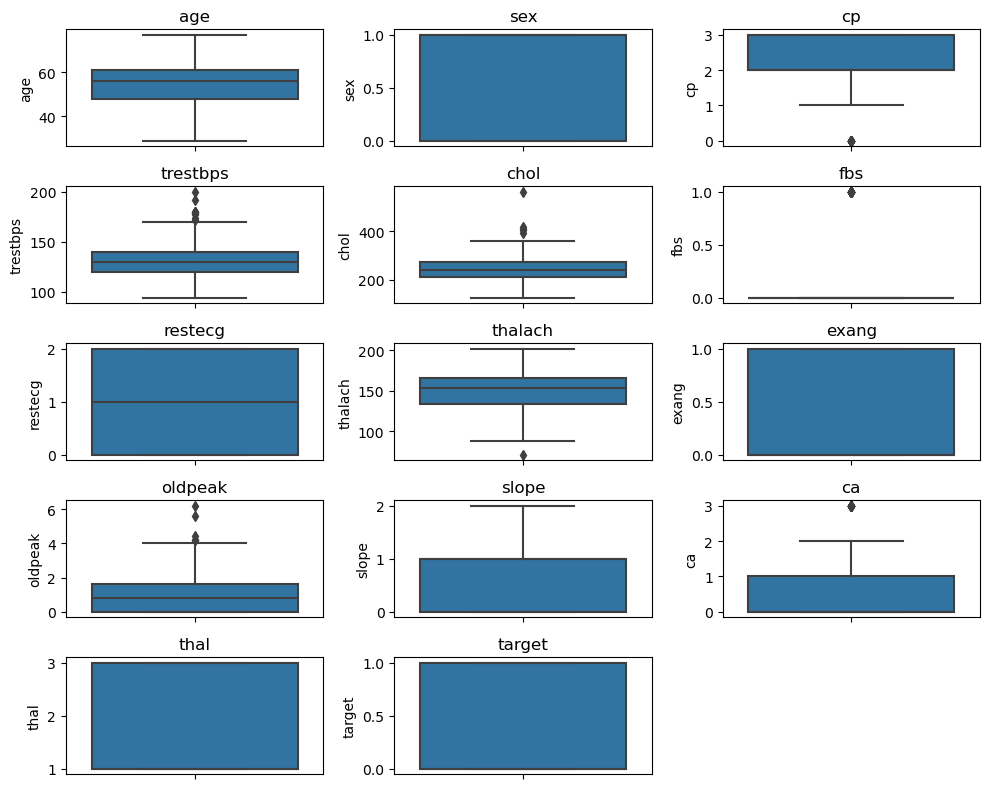

In [8]:
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

plt.figure(figsize=(10, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

 Cleaning Data

Age Column

In [9]:
df['age']

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64

In [10]:
df['age'].value_counts().head(10)

age
58    19
57    17
54    16
59    14
52    13
51    12
60    12
62    11
56    11
44    11
Name: count, dtype: int64

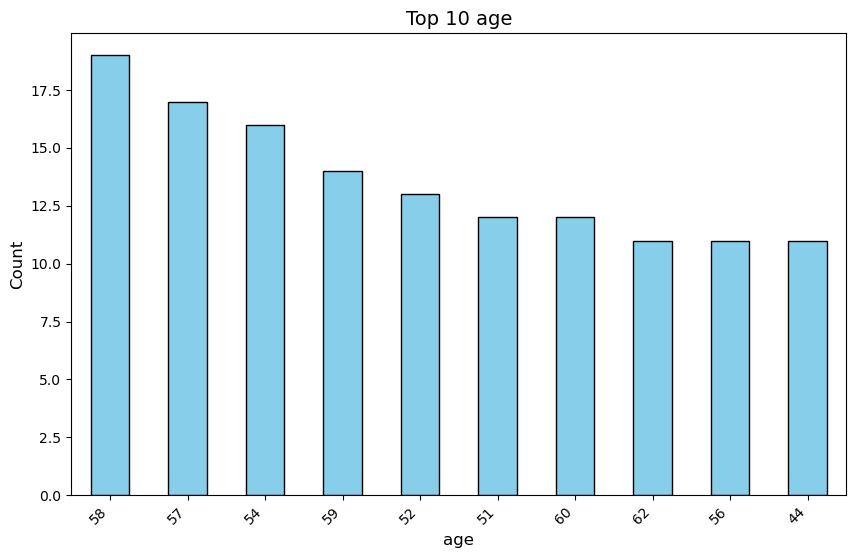

In [11]:
Age_Counts = df["age"].value_counts().head(10)

plt.figure(figsize=(10,6))
Age_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 age", fontsize=14)
plt.xlabel("age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

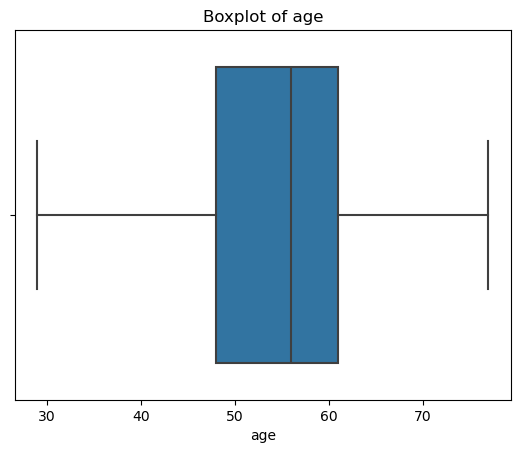

In [12]:
sns.boxplot(x=df['age'])
plt.title("Boxplot of age")
plt.show()

Sex Column

In [13]:
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    1
300    1
301    0
302    1
Name: sex, Length: 303, dtype: int64

In [14]:
df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

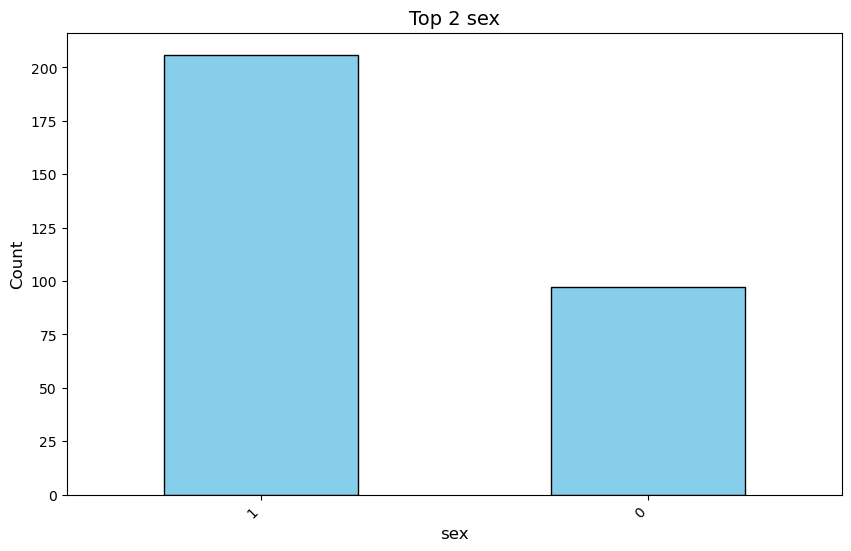

In [15]:
Sex_Counts = df["sex"].value_counts().head()

plt.figure(figsize=(10,6))
Sex_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 2 sex", fontsize=14)
plt.xlabel("sex", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Cp Column

In [16]:
df['cp']

0      0
1      3
2      3
3      2
4      1
      ..
298    0
299    3
300    3
301    1
302    2
Name: cp, Length: 303, dtype: int64

In [17]:
df['cp'].value_counts()

cp
3    144
2     86
1     50
0     23
Name: count, dtype: int64

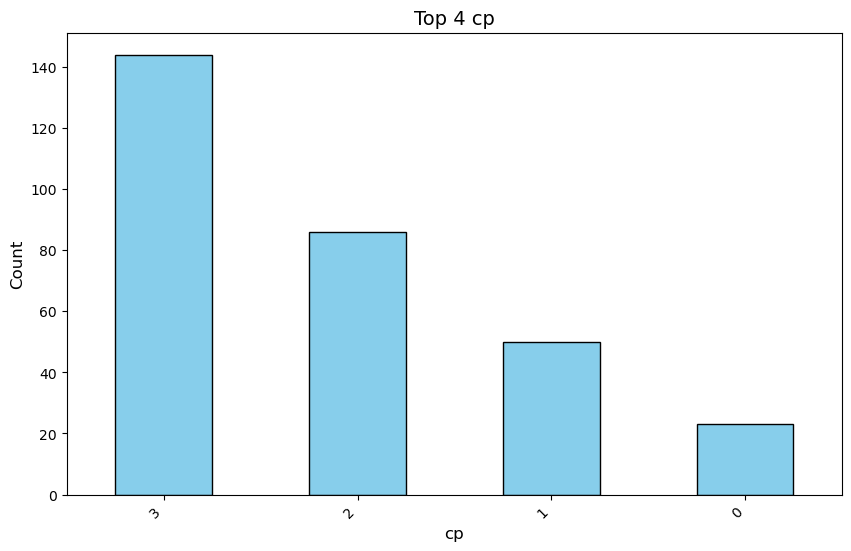

In [18]:
Cp_Counts = df["cp"].value_counts().head()

plt.figure(figsize=(10,6))
Cp_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 4 cp", fontsize=14)
plt.xlabel("cp", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Trestbps Column

In [19]:
df['trestbps']

0      145
1      160
2      120
3      130
4      130
      ... 
298    110
299    144
300    130
301    130
302    138
Name: trestbps, Length: 303, dtype: int64

In [20]:
df['trestbps'].value_counts().head(10)

trestbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
125    11
160    11
112     9
Name: count, dtype: int64

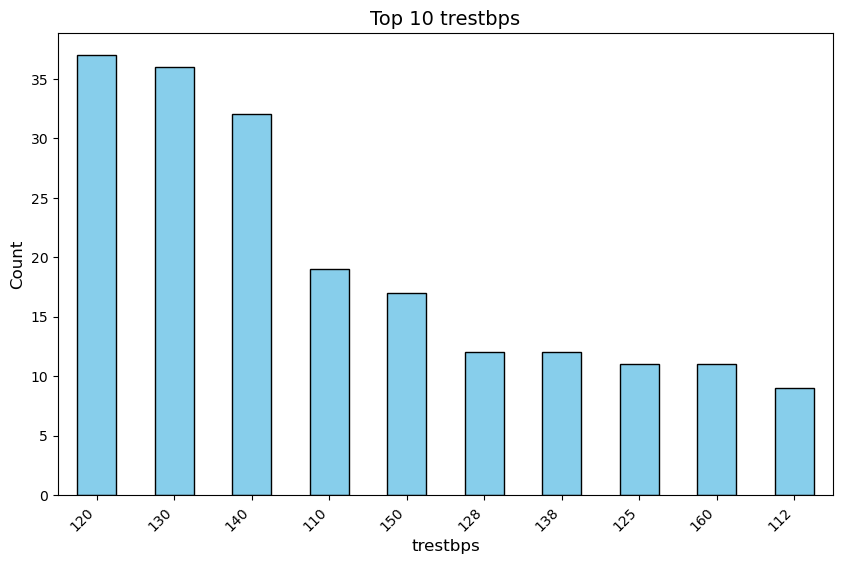

In [21]:
Trestbps_Counts = df["trestbps"].value_counts().head(10)

plt.figure(figsize=(10,6))
Trestbps_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 trestbps", fontsize=14)
plt.xlabel("trestbps", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

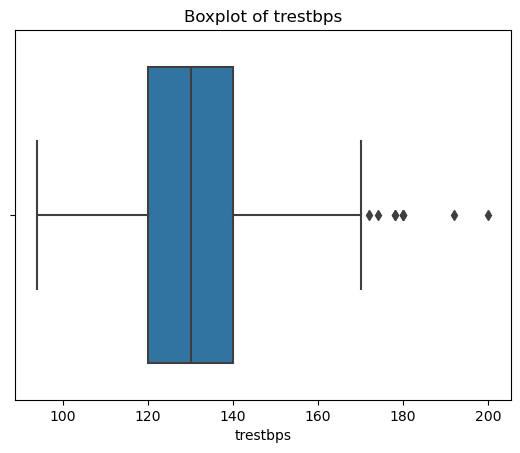

In [22]:
sns.boxplot(x=df['trestbps'])
plt.title("Boxplot of trestbps")
plt.show()

In [23]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['trestbps'] >= lower_bound) &
 (df['trestbps'] <= upper_bound)]

In [24]:
df['trestbps'] = df['trestbps'].clip(lower=lower_bound,
                                    upper=upper_bound)

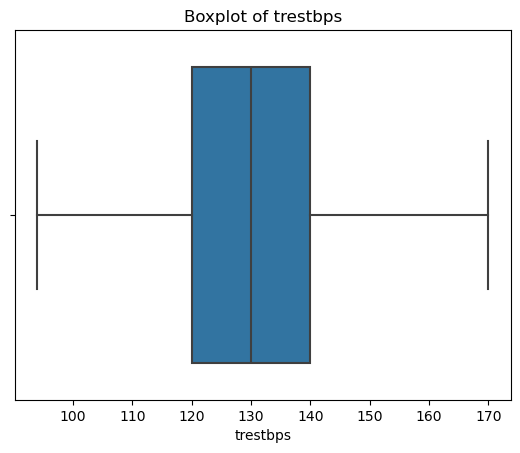

In [25]:
sns.boxplot(x=df['trestbps'])
plt.title("Boxplot of trestbps")
plt.show()

Chol Column

In [26]:
df['chol']

0      233
1      286
2      229
3      250
4      204
      ... 
298    264
299    193
300    131
301    236
302    175
Name: chol, Length: 303, dtype: int64

In [27]:
df['chol'].value_counts().head(10)

chol
204    6
234    6
197    6
254    5
269    5
212    5
239    4
233    4
177    4
282    4
Name: count, dtype: int64

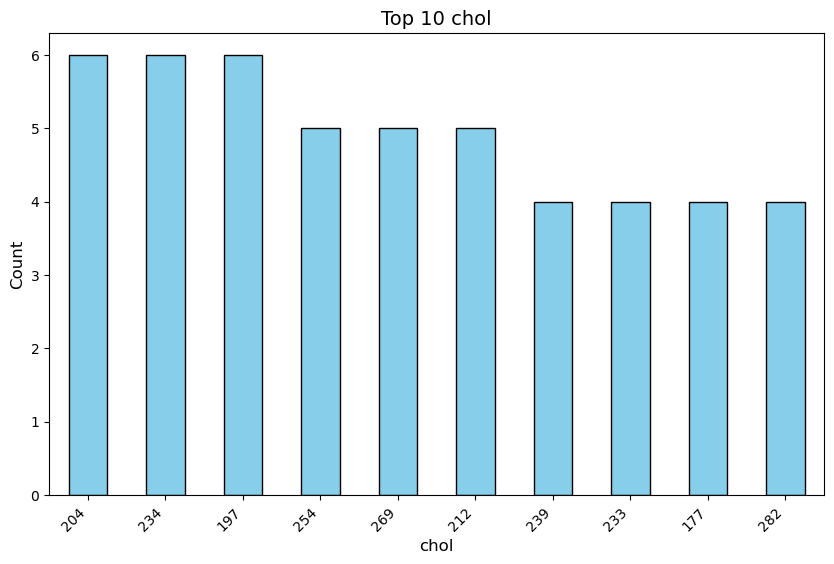

In [28]:
Chol_Counts = df["chol"].value_counts().head(10)

plt.figure(figsize=(10,6))
Chol_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 chol", fontsize=14)
plt.xlabel("chol", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

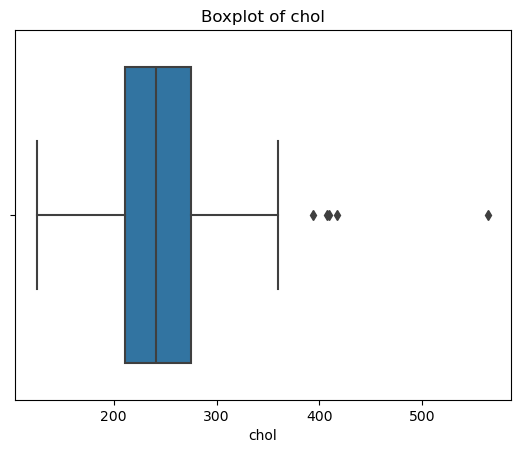

In [29]:
sns.boxplot(x=df['chol'])
plt.title("Boxplot of chol")
plt.show()

In [30]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['chol'] >= lower_bound) &
 (df['chol'] <= upper_bound)]

In [31]:
df['chol'] = df['chol'].clip(lower=lower_bound,
                            upper=upper_bound)

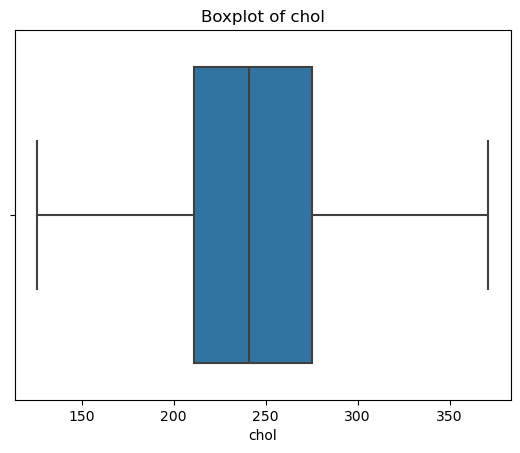

In [32]:
sns.boxplot(x=df['chol'])
plt.title("Boxplot of chol")
plt.show()

Fbs Column

In [33]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    1
300    0
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [34]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

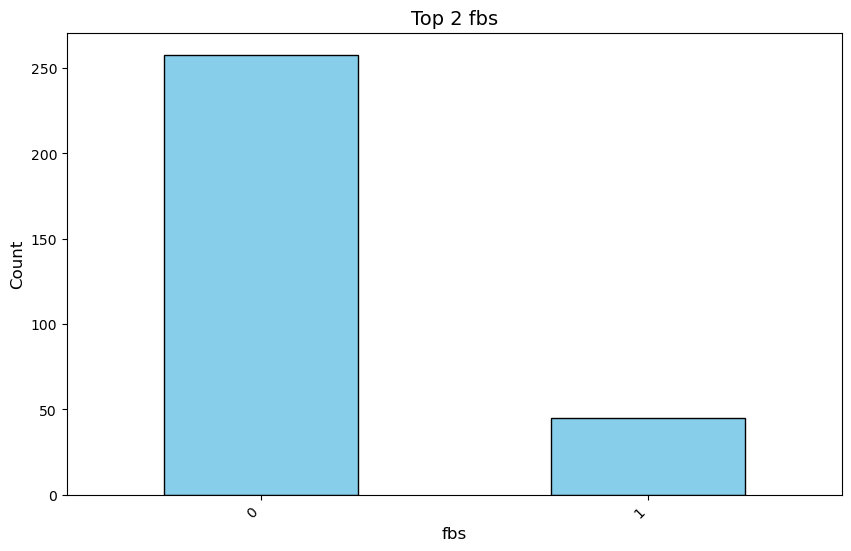

In [35]:
Fbs_Counts = df["fbs"].value_counts().head()

plt.figure(figsize=(10,6))
Fbs_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 2 fbs", fontsize=14)
plt.xlabel("fbs", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Thalach Column

In [36]:
df['thalach']

0      150
1      108
2      129
3      187
4      172
      ... 
298    132
299    141
300    115
301    174
302    173
Name: thalach, Length: 303, dtype: int64

In [37]:
df['thalach'].value_counts().head(10)

thalach
162    11
163     9
160     9
152     8
172     7
173     7
132     7
144     7
143     7
125     7
Name: count, dtype: int64

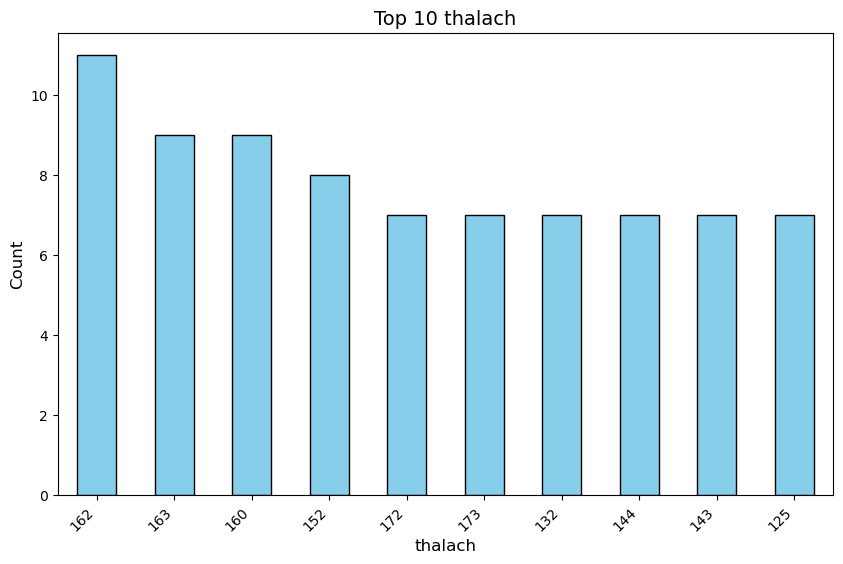

In [38]:
Thalach_Counts = df["thalach"].value_counts().head(10)

plt.figure(figsize=(10,6))
Thalach_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 thalach", fontsize=14)
plt.xlabel("thalach", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

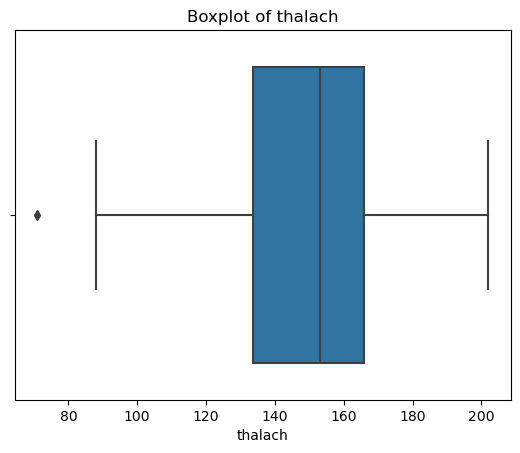

In [39]:
sns.boxplot(x=df['thalach'])
plt.title("Boxplot of thalach")
plt.show()

In [40]:
Q1 = df['thalach'].quantile(0.25)
Q3 = df['thalach'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['thalach'] >= lower_bound) &
 (df['thalach'] <= upper_bound)]

In [41]:
df['thalach'] = df['thalach'].clip(lower=lower_bound,
                                  upper=upper_bound)

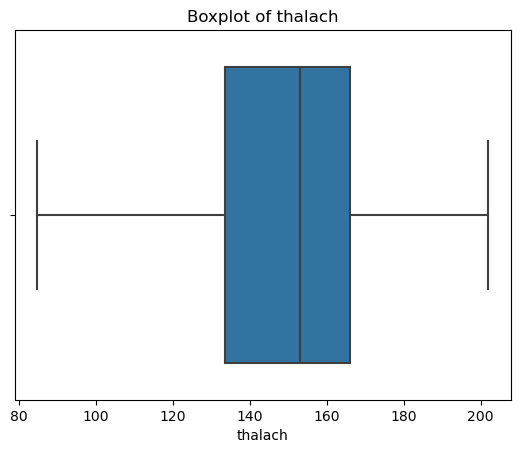

In [42]:
sns.boxplot(x=df['thalach'])
plt.title("Boxplot of thalach")
plt.show()

Exang Column

In [43]:
df['exang']

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: exang, Length: 303, dtype: int64

In [44]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

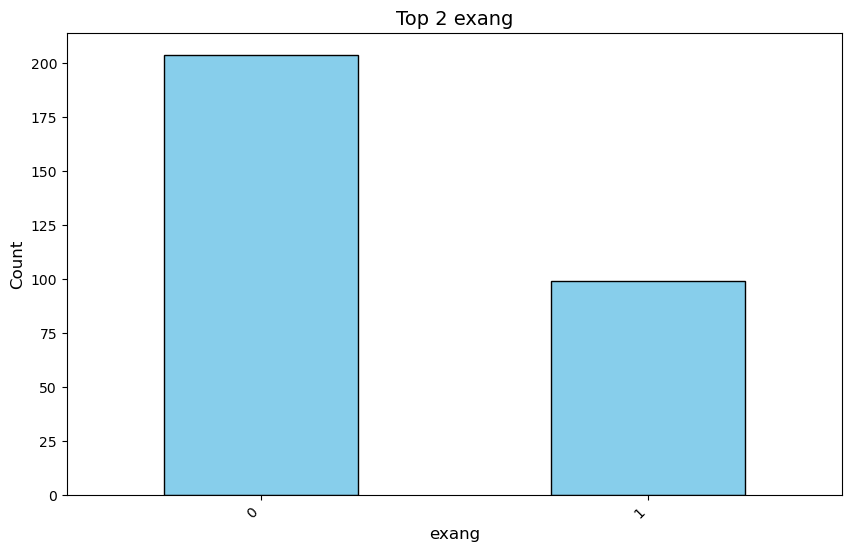

In [45]:
Exang_Counts = df["exang"].value_counts().head()

plt.figure(figsize=(10,6))
Exang_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 2 exang", fontsize=14)
plt.xlabel("exang", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Oldpeak Column

In [46]:
df['oldpeak']

0      2.3
1      1.5
2      2.6
3      3.5
4      1.4
      ... 
298    1.2
299    3.4
300    1.2
301    0.0
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [47]:
df['oldpeak'].value_counts().head(10)

oldpeak
0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
Name: count, dtype: int64

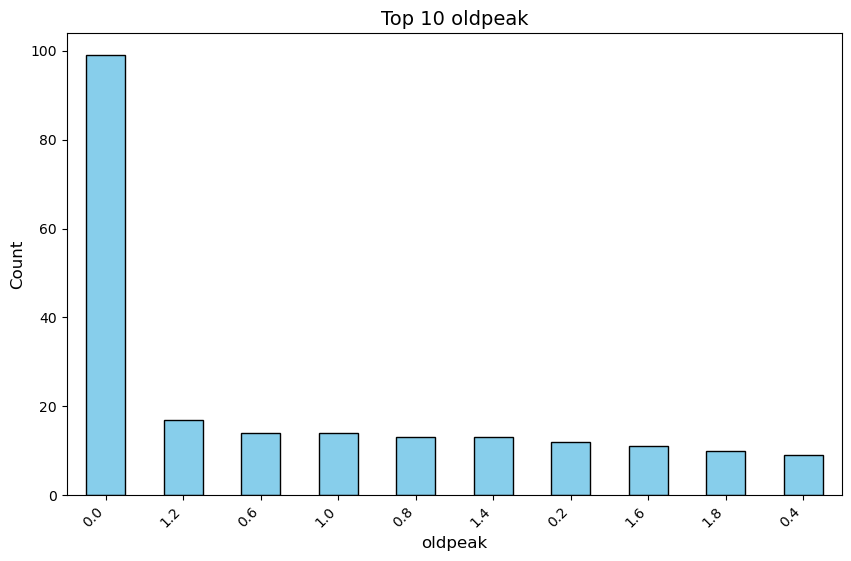

In [48]:
Oldpeak_Counts = df["oldpeak"].value_counts().head(10)

plt.figure(figsize=(10,6))
Oldpeak_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 oldpeak", fontsize=14)
plt.xlabel("oldpeak", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

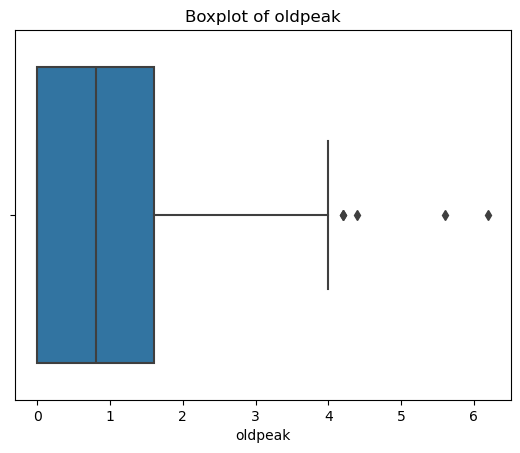

In [49]:
sns.boxplot(x=df['oldpeak'])
plt.title("Boxplot of oldpeak")
plt.show()

In [50]:
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['oldpeak'] >= lower_bound) &
 (df['oldpeak'] <= upper_bound)]

In [51]:
df['oldpeak'] = df['oldpeak'].clip(lower=lower_bound,
                                  upper=upper_bound)

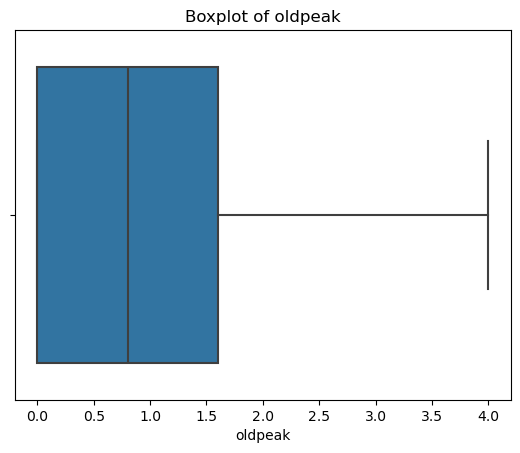

In [52]:
sns.boxplot(x=df['oldpeak'])
plt.title("Boxplot of oldpeak")
plt.show()

In [53]:
def fill_NAN_with_percentage(df, col_name):
    value_counts = df[col_name].value_counts(normalize=True)
    nan_indices = df[df[col_name].isna()].index
    fill_values = np.random.choice(value_counts.index, size=len(nan_indices), p=value_counts.values)
    df.loc[nan_indices, col_name] = fill_values
    return df

In [54]:
df.loc[df['oldpeak'] == 0, 'oldpeak'] = np.nan

In [55]:
df = fill_NAN_with_percentage(df, "oldpeak")

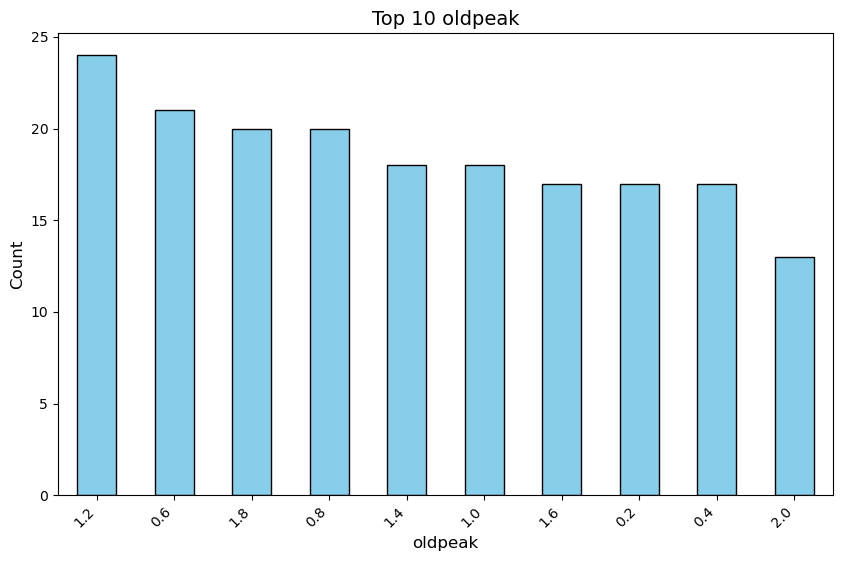

In [56]:
Oldpeak_Counts = df["oldpeak"].value_counts().head(10)

plt.figure(figsize=(10,6))
Oldpeak_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 oldpeak", fontsize=14)
plt.xlabel("oldpeak", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

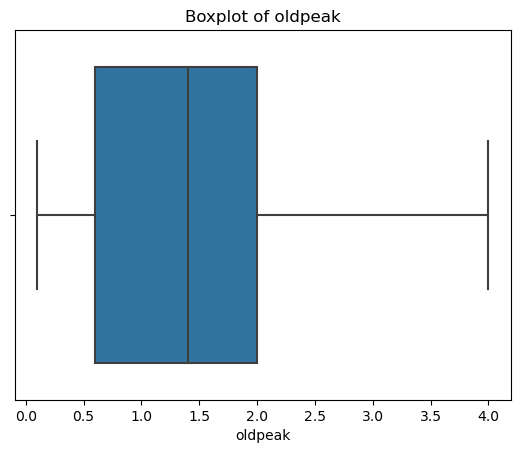

In [57]:
sns.boxplot(x=df['oldpeak'])
plt.title("Boxplot of oldpeak")
plt.show()

Slope Column

In [58]:
df['slope']

0      2
1      1
2      1
3      2
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: slope, Length: 303, dtype: int64

In [59]:
df['slope'].value_counts()

slope
0    142
1    140
2     21
Name: count, dtype: int64

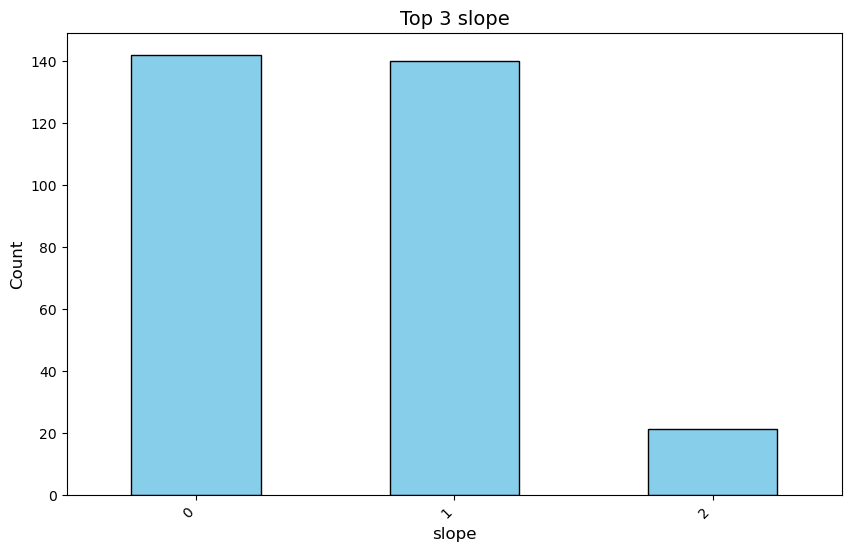

In [60]:
Slope_Counts = df["slope"].value_counts().head()

plt.figure(figsize=(10,6))
Slope_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 3 slope", fontsize=14)
plt.xlabel("slope", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Ca Column

In [61]:
df['ca']

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    2
300    1
301    1
302    0
Name: ca, Length: 303, dtype: int64

In [62]:
df['ca'].value_counts()

ca
0    180
1     65
2     38
3     20
Name: count, dtype: int64

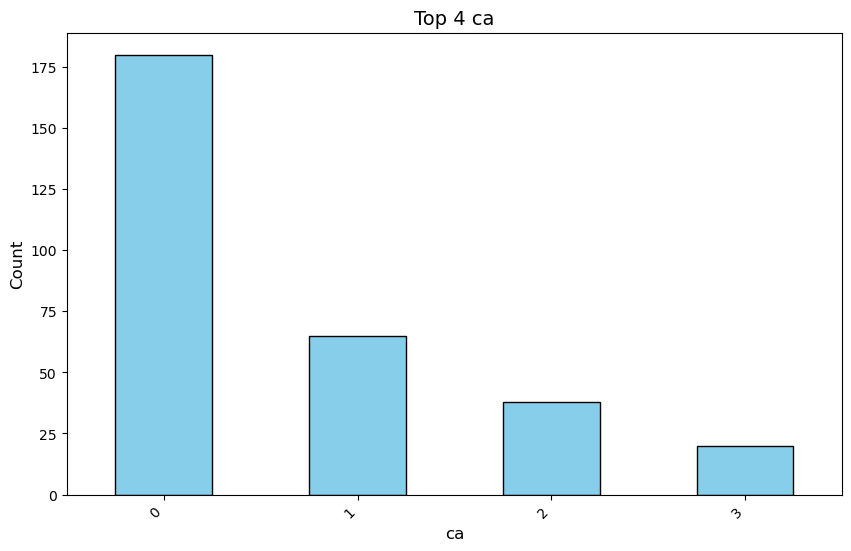

In [63]:
Ca_Counts = df["ca"].value_counts().head()

plt.figure(figsize=(10,6))
Ca_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 4 ca", fontsize=14)
plt.xlabel("ca", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Thal Column

In [64]:
df['thal']

0      2
1      1
2      3
3      1
4      1
      ..
298    3
299    3
300    3
301    1
302    1
Name: thal, Length: 303, dtype: int64

In [65]:
df['thal'].value_counts()

thal
1    168
3    117
2     18
Name: count, dtype: int64

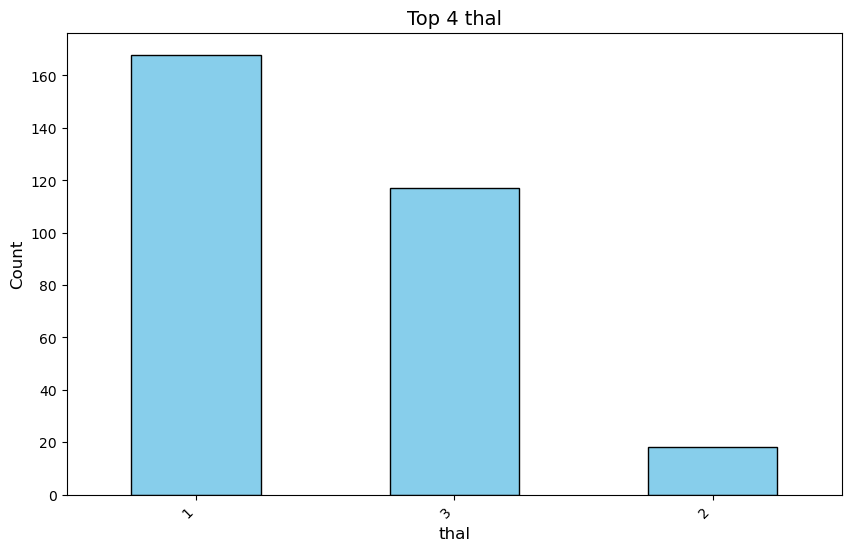

In [66]:
Thal_Counts = df["thal"].value_counts().head()

plt.figure(figsize=(10,6))
Thal_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 4 thal", fontsize=14)
plt.xlabel("thal", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Target Column

In [67]:
df['target']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

In [68]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

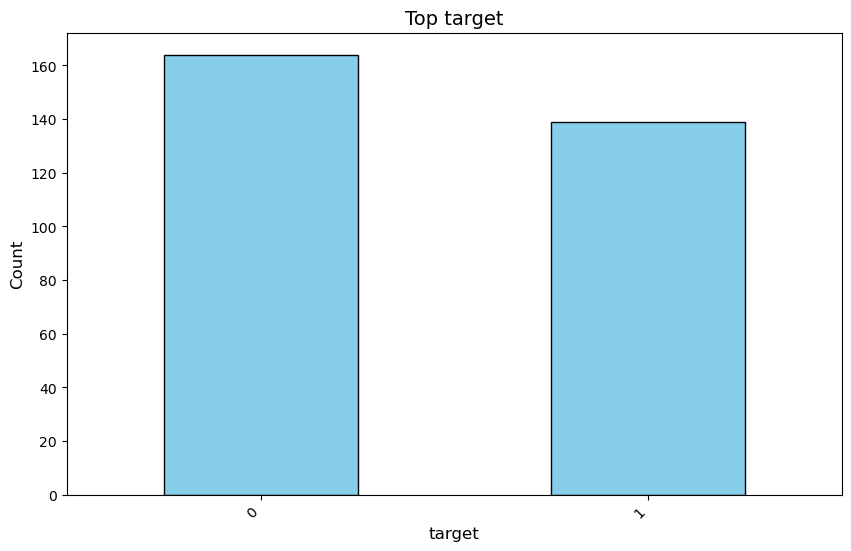

In [69]:
Target_Counts = df["target"].value_counts().head()

plt.figure(figsize=(10,6))
Target_Counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top target", fontsize=14)
plt.xlabel("target", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Making Some Visualization

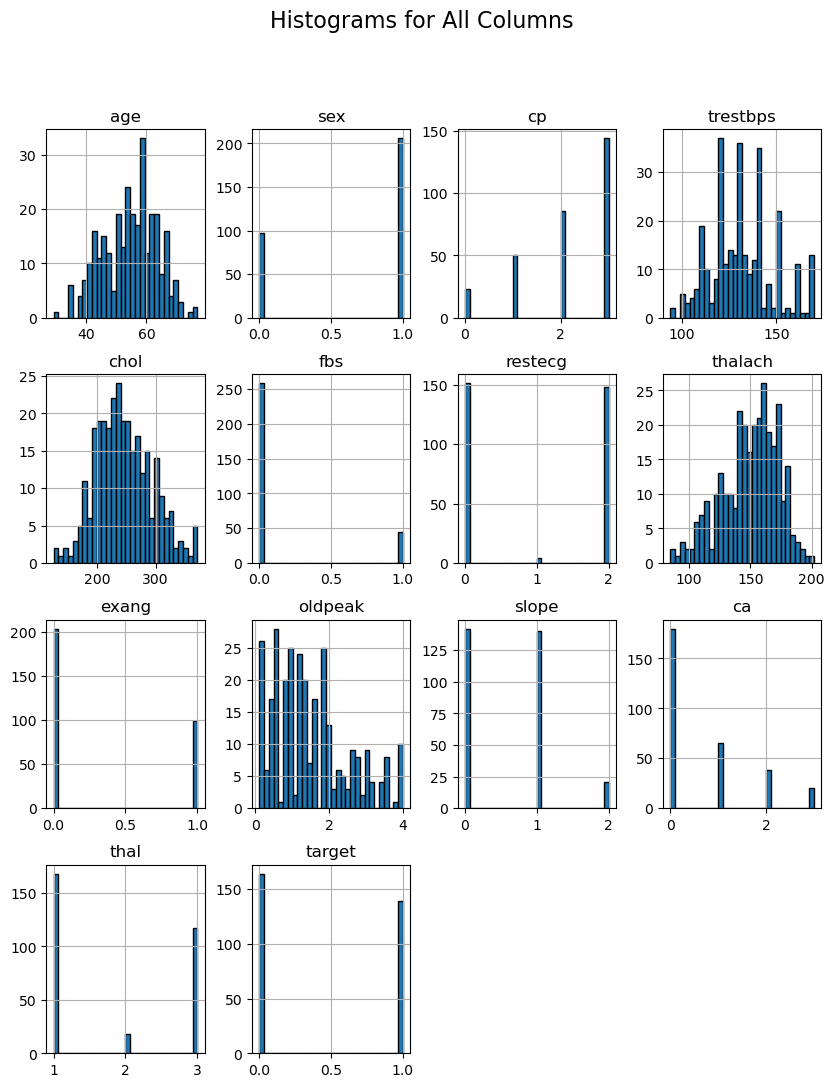

In [70]:
df.hist(figsize=(10,12), bins=30, edgecolor="black")
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.show()

<Axes: >

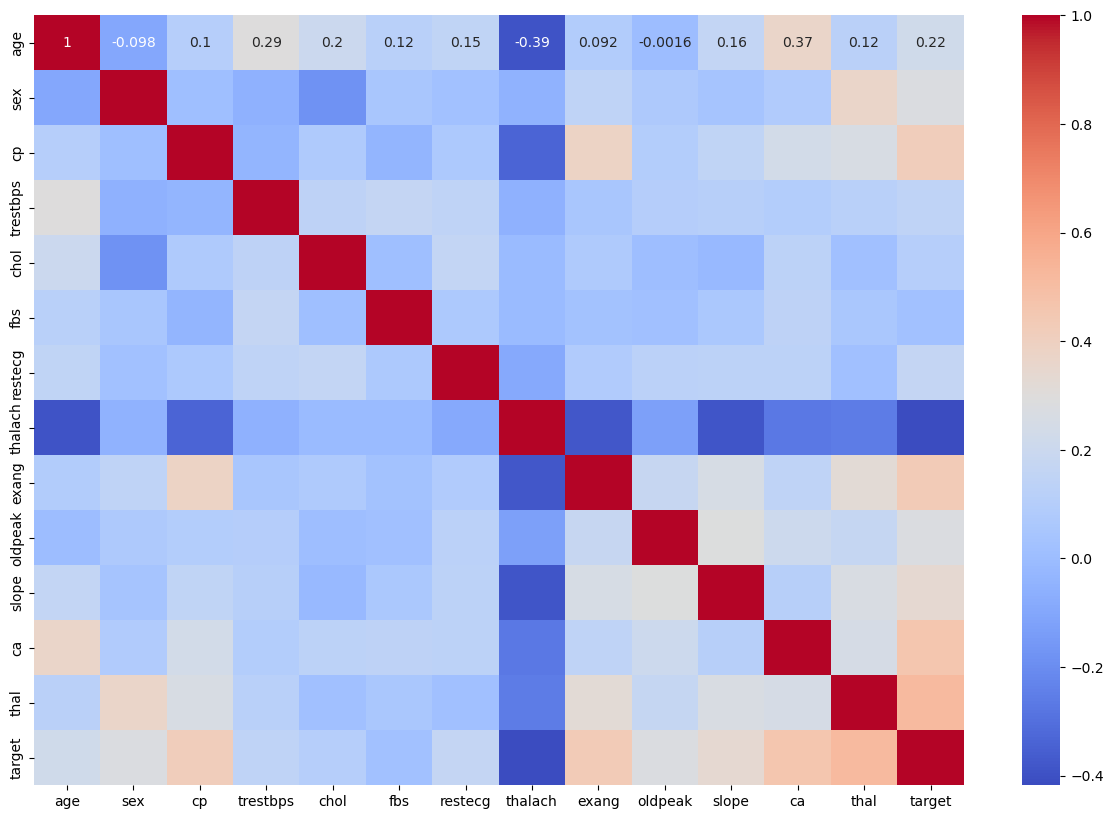

In [71]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# One-Hot Encoding & Standardizing using a pipline
The columns to apply One-Hot Encoding to are:
`sex`,`cp`,`fbs`,`restecg`,`exang`,`slope`,`ca`,`thal`

The columns to apply Standardization to are:
`age`, `trestbps`,`chol`,`thalach`,`oldpeak`

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [73]:
X = df.drop(target, axis=1)
y = df[target]

X_processed = preprocessor.fit_transform(X)

print("original features:", X.shape)
print("processed features:", X_processed.shape)

original features: (303, 13)
processed features: (303, 28)


In [74]:
onehot_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
processed_column_names = numerical_features + onehot_features

X_processed_df = pd.DataFrame(X_processed, columns=processed_column_names)

display(X_processed_df.head())

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.821446,-0.265040,0.015306,0.785426,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.392002,1.723905,0.851214,-1.835388,-0.000324,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.392002,-0.682652,-0.349285,-0.910041,1.080082,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.932564,-0.081013,0.093004,1.645679,1.964050,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.489288,-0.081013,-0.875820,0.984717,-0.098543,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
processed_df = X_processed_df.copy()
processed_df['target'] = y.values
display(processed_df.head())

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target
0,0.948726,0.821446,-0.265040,0.015306,0.785426,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,1.723905,0.851214,-1.835388,-0.000324,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.392002,-0.682652,-0.349285,-0.910041,1.080082,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,-0.081013,0.093004,1.645679,1.964050,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-0.081013,-0.875820,0.984717,-0.098543,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [76]:
processed_df.to_csv('heart_disease_preprocessed.csv', index=False)
print("dataset saved successfully")

dataset saved successfully


# Summary:
* **First**, the dataset was explored using descriptive statistics to understand its structure, distributions, and overall characteristics.
* **Second**, missing values, duplicates, and outliers were checked and handled column by column to ensure data quality.
* **Third**, histograms were plotted for all features to visualize their distributions and detect any unusual patterns.
* **Finally**, the dataset was left clean, consistent, and ready for further analysis or modeling.